# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Plotting with Pandas

Week 2 | Day 5

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Generate line plots
- Generate bar charts
- Generate scatter plots
- Generate histograms
- Efficiently work with the MPL object model

## Pandas plotting documentation

[Link to Documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

![](http://i.imgur.com/bkXdWZT.png)

## Start with our imports and style sheet

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

## Import our data

In [2]:
df = pd.DataFrame(np.random.randn(10, 4), 
                  columns=['col1', 'col2', 'col3', 'col4'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])

In [3]:
df

,col1,col2,col3,col4
a,-0.520782,0.833124,0.905278,0.023047
b,1.155814,0.372548,1.644831,-1.331763
c,-0.079838,0.365915,1.140463,-1.410013
d,0.387466,-0.369649,0.190606,1.339778
e,0.446985,0.394453,-0.038360,0.630725
f,0.807982,1.977880,0.084799,-0.094401
g,0.538563,-0.026819,0.516381,1.745340
h,0.041018,-1.844480,0.588125,1.583256
i,-0.689144,0.581527,-0.200080,0.509542
j,-0.042413,0.168263,-1.300723,0.821194


## Line plot - DataFrame

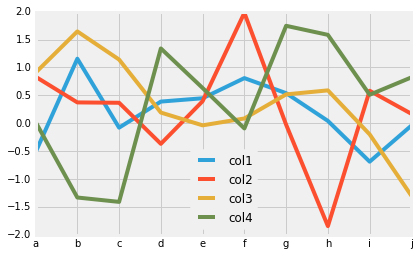

In [4]:
df.plot()

Notice we by default we are given a line plot with a legend. Notice also we don't need to set the line colors; they have been choosen for us.

## Line plot - Series

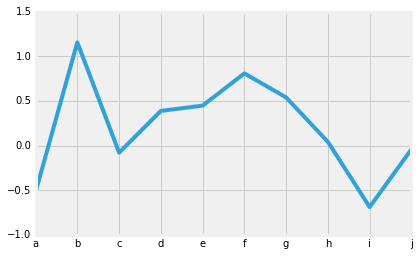

In [5]:
df['col1'].plot()

## We can pass in parameters to change the dimensions and the size

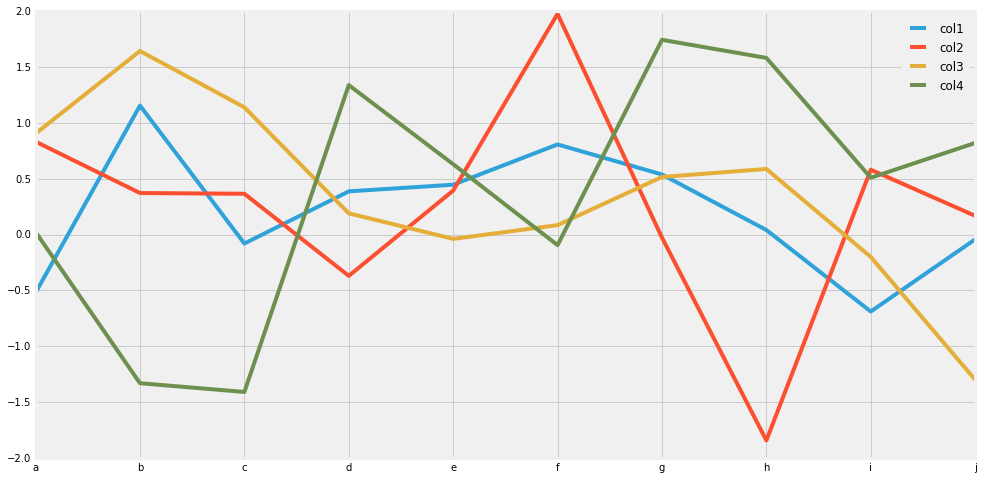

In [7]:
df.plot(figsize=(15,8))

The order of figsize is width then height

## We can change the color

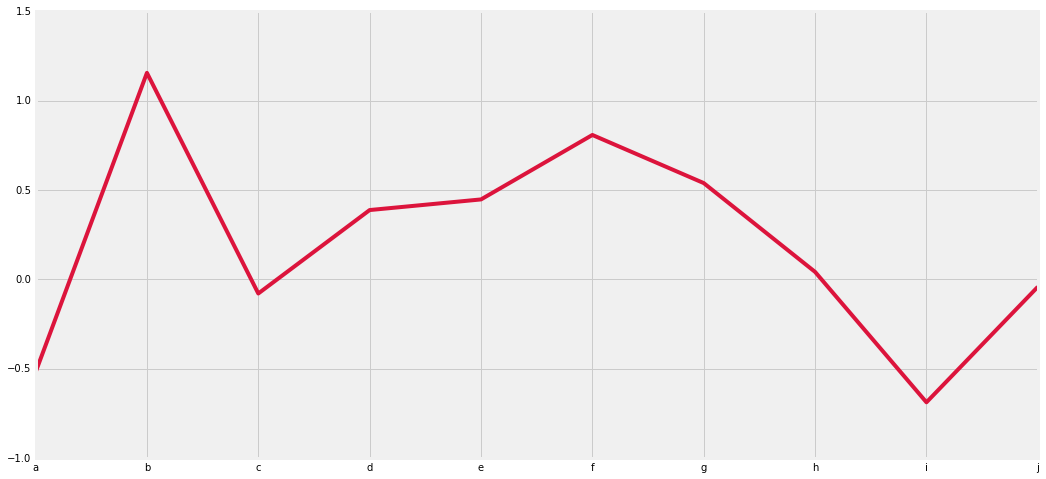

In [8]:
df['col1'].plot(color='crimson', figsize=(16,8))

## We can change the style - markers & line styles

[Line Style Documentation](http://matplotlib.org/api/lines_api.html)

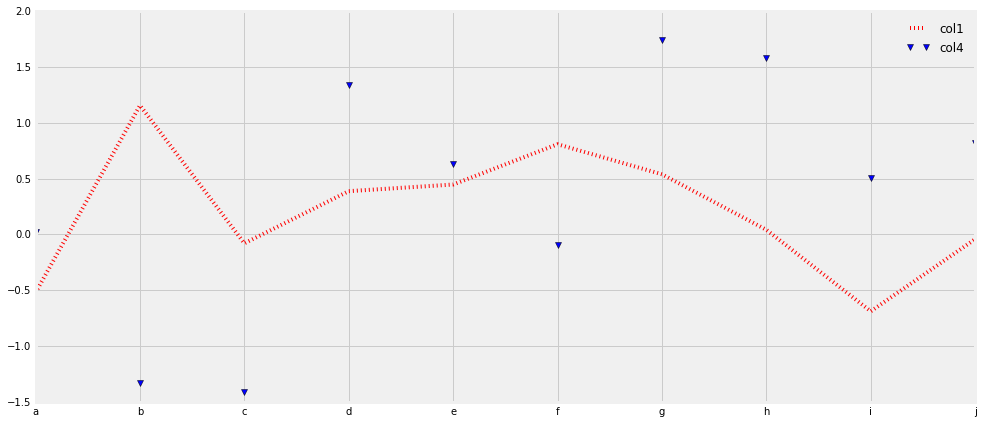

In [9]:
df[['col1', 'col4']].plot(figsize=(15,7),\
                          style={'col1': ':r', 'col4': 'vb'})

## Exercise

Using the df DataFrame
- Create a line plot of col2 and col3. For col2 use a green o and for col3 use a blue dashed line. 
- Set the width to 12 and the height to 8.
- Change the style sheet to something you find here [Style Sheets](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

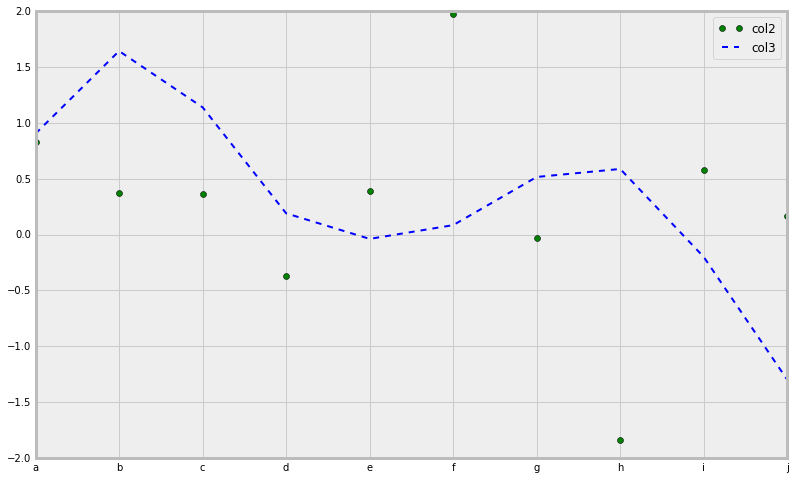

In [19]:
plt.style.use('bmh')
df[['col2', 'col3']].plot(figsize=(12,8),\
                          style={'col2': 'og', 'col3': '--b'})

# Let's see a bit more customization

## We can change the ticks' size

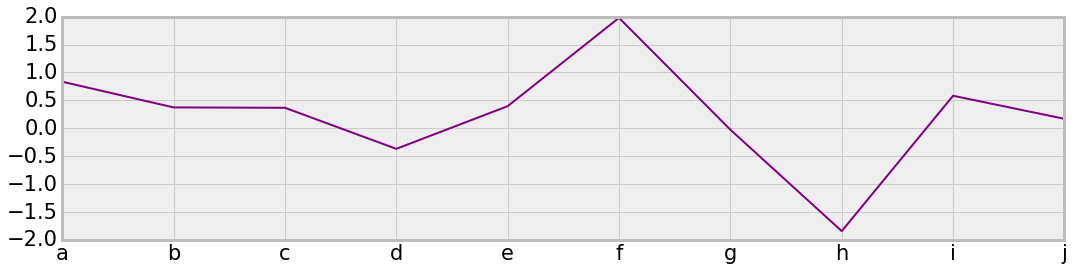

In [20]:
df['col2'].plot(figsize=(16,4), color='purple', fontsize=21)

You can see we have changed both the x and y tick labels size

## We can also change which ticks are visible

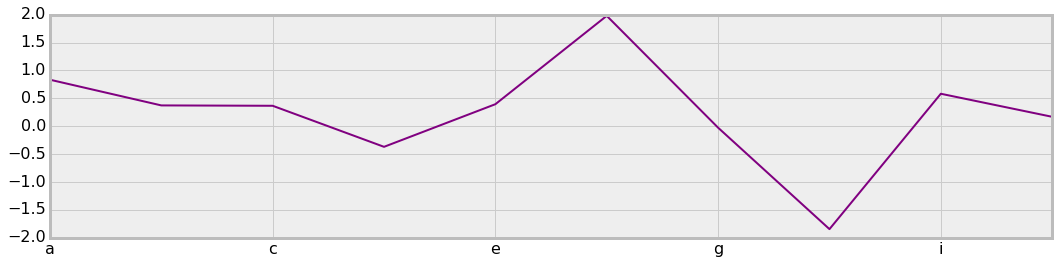

In [22]:
# list comprehension to get only the even ticks
ticks_to_show = [x for x in range(len(df['col2'].index)) if x % 2 == 0]

df['col2'].plot(figsize=(16,4), color='purple', xticks=ticks_to_show, fontsize=16)

You can see we only show the even markers now

## We can change the label rotation

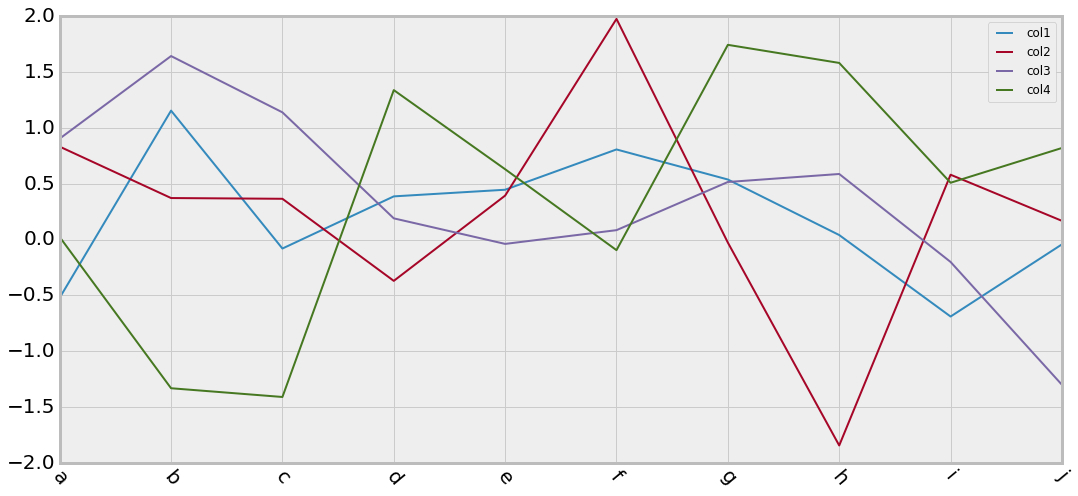

In [23]:
df.plot(figsize=(16,8), fontsize=20, rot=-50)

## We can add a title

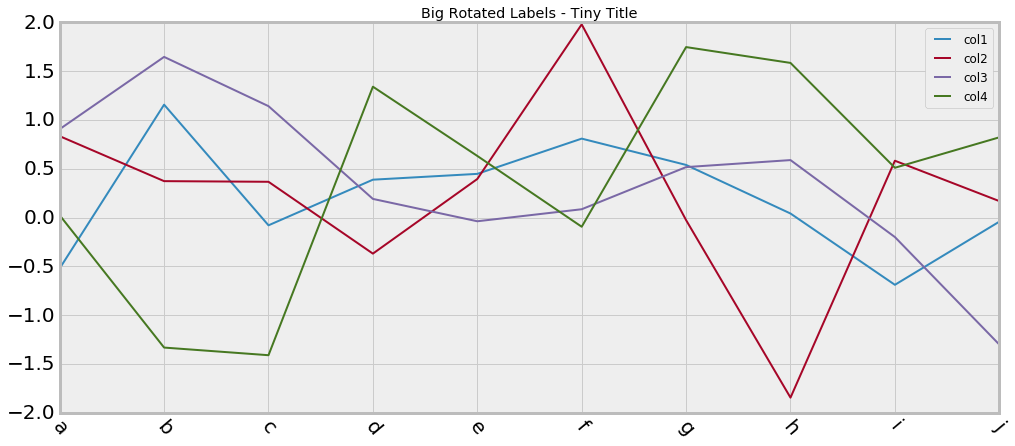

In [24]:
df.plot(figsize=(15,7), title='Big Rotated Labels - Tiny Title', fontsize=20, rot=-50, )

## We have to use .set_title() to fix that

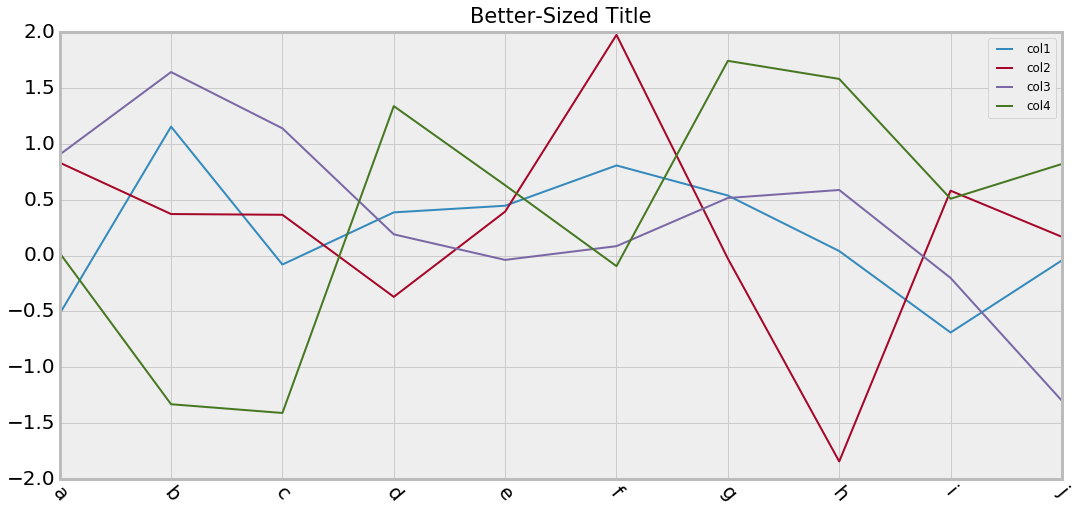

In [25]:
df.plot(figsize=(16,8), fontsize=20, rot=-50).set_title('Better-Sized Title', fontsize=21, y=1.01)

## Exercise:

Using the df DataFrame:
- Create a line chart with col4.
- Set the figure size to 14 by 7.
- Rotate the labels 90 degrees and give them a fontsize of 16. 
- Set the color to dark orange. 
- Set the title to "My Cool Plot" and move it within the body of the plot.
- Make the font size of the title 35

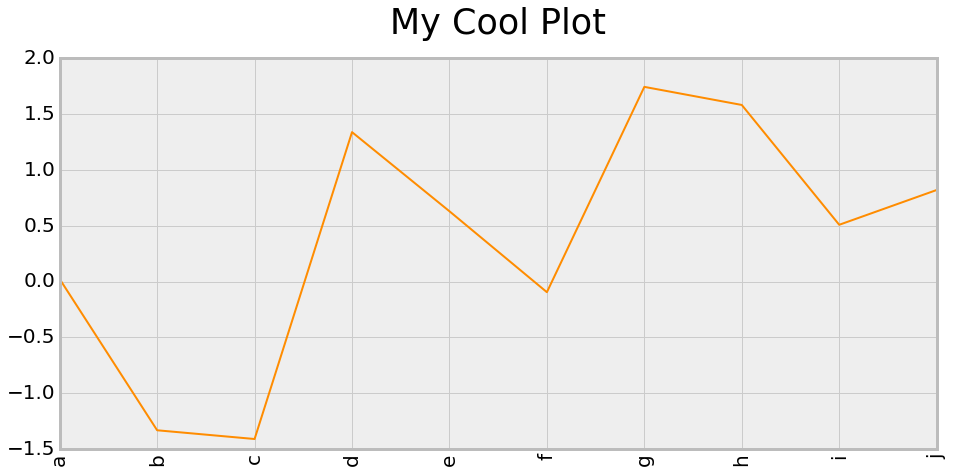

In [36]:
df['col4'].plot(figsize=(14,7), fontsize=20, rot=90, color='darkorange').set_title('My Cool Plot', fontsize=35, y=1.05)

## All the functionality of Matplotlib is available

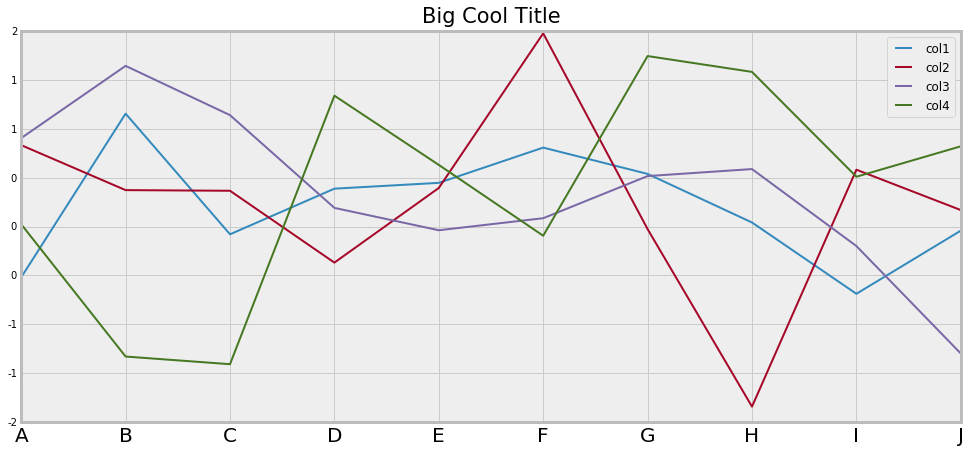

In [37]:
# save the plot as fig
ax = df.plot(figsize=(15,7), fontsize=20)

# set the title
ax.set_title('Big Cool Title', fontsize=21, y=1.01)

# shrink y ticklabels and use ints
ax.set_yticklabels([int(y) for y in ax.get_yticks()], fontsize=10)

# change x tick labels to upper case by retrieving from ax object
ax.set_xticklabels([x.get_text().upper() for x in ax.get_xticklabels()]);

## Exercise

Using the df DataFrame:
- Create a plot using the full data frame. 
- Set the figure size to 16 by 8.
- Give it any title you want with a fontsize of 22. 
- Move the title so that it is in the the body of the graph. 
- Set a y label  of "this is my y axis" and an x label equal to "this is my x axis". 
- Give both labels a fontsize of 16. 
- Rotate your x axis label - what you just created - 180 degrees.
- Set the x tick labels equal to a dash, '-' if the label is e or f. (hint: use a list comprehension)

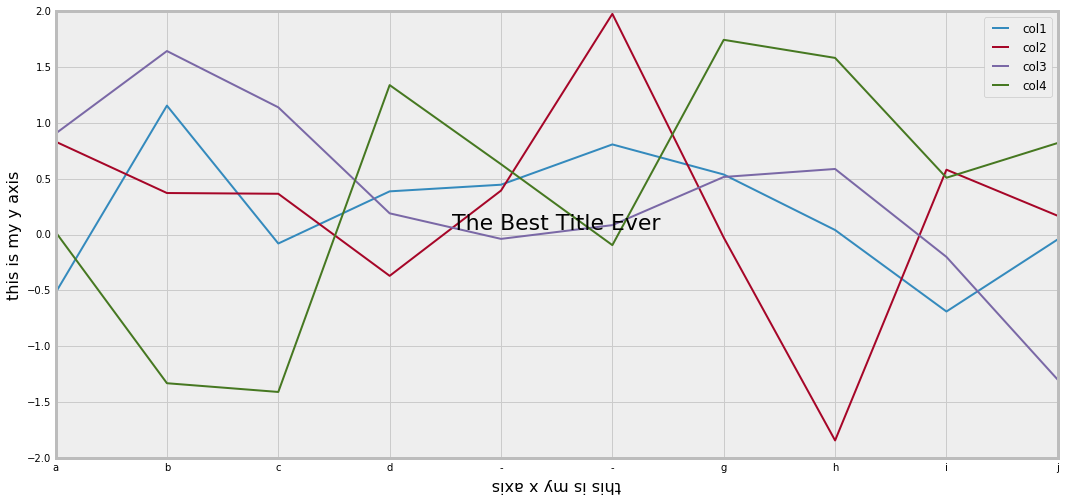

In [53]:
qx = df.plot(figsize=(16,8))
qx.set_title('The Best Title Ever', fontsize=22, y=0.5)
qx.set_xlabel("this is my x axis", fontsize=16, rotation=180)
qx.set_ylabel("this is my y axis", fontsize=16)
qx.set_xticklabels(['-' if x.get_text() == 'e' or x.get_text() =='f' else x for x in qx.get_xticklabels()]);

# Bar Plots

## Series

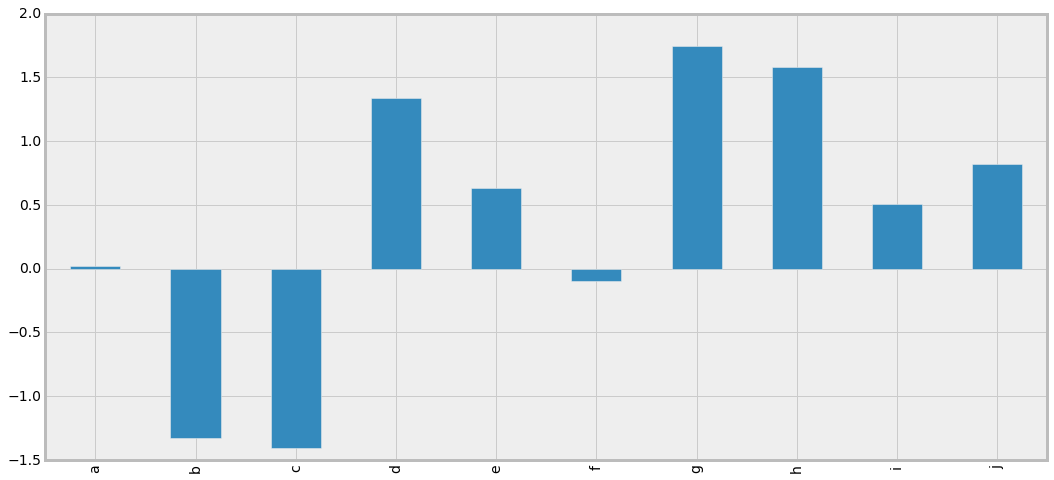

In [54]:
df['col4'].plot(kind='bar', figsize=(16,8), fontsize=14) 

Notice we have to change the 'kind' parameter

## Using a DataFrame and matplotlib commands we can get fancy

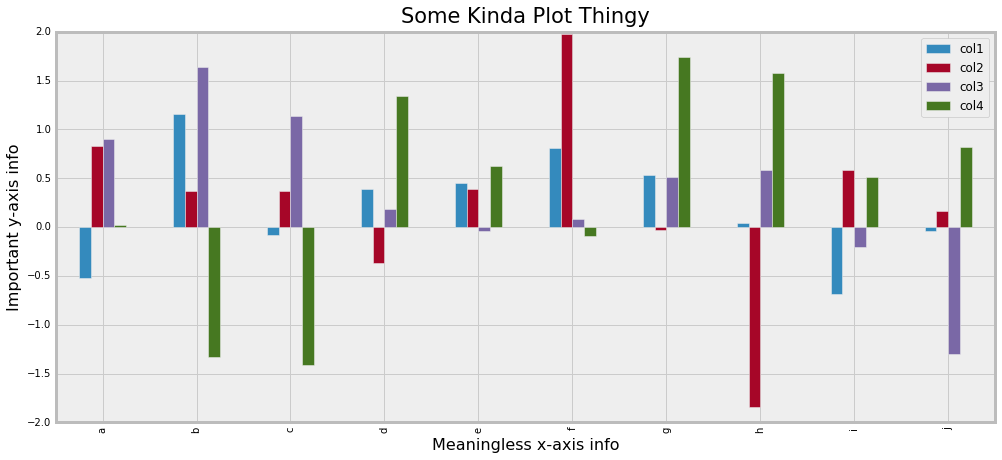

In [56]:
ax = df.plot(kind='bar', figsize=(15,7))

# set the title
ax.set_title('Some Kinda Plot Thingy', fontsize=21, y=1.01)

# move the legend
ax.legend(loc=1)

# x-axis labels
ax.set_ylabel('Important y-axis info', fontsize=16)

# y-axis labels
ax.set_xlabel('Meaningless x-axis info', fontsize=16)

## We can switch to horizontal bars...

We just need to change kind to 'barh'

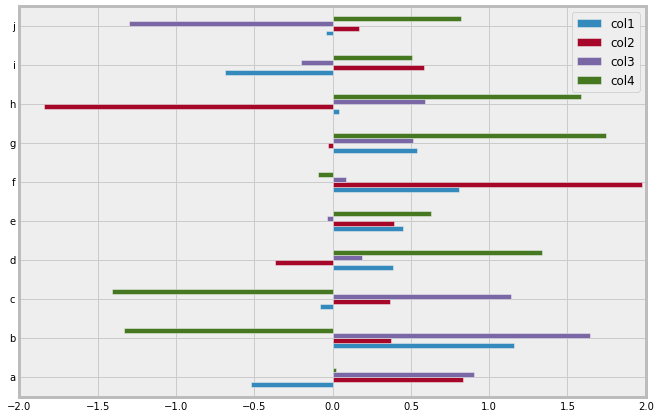

In [57]:
df.plot(kind='barh', figsize=(10,7))

## Exercise:

- Create a bar chart using col1 and col2.
- Give it a large title of your choosing. 
- Move the legend to the lower-left corner.
- Do the same thing but with horizontal bars.
- Move the legend to the upper right.

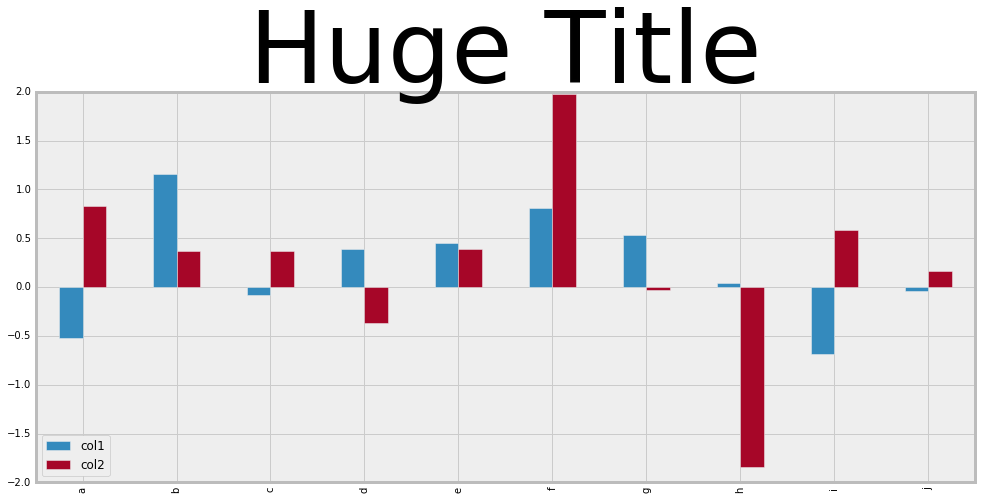

In [73]:
ax = df[['col1','col2']].plot(kind='bar', figsize=(15,7))

# set the title
ax.set_title('Huge Title', fontsize=100, y=1.01)

# move the legend
ax.legend(loc=3)


## We can use stacked bars

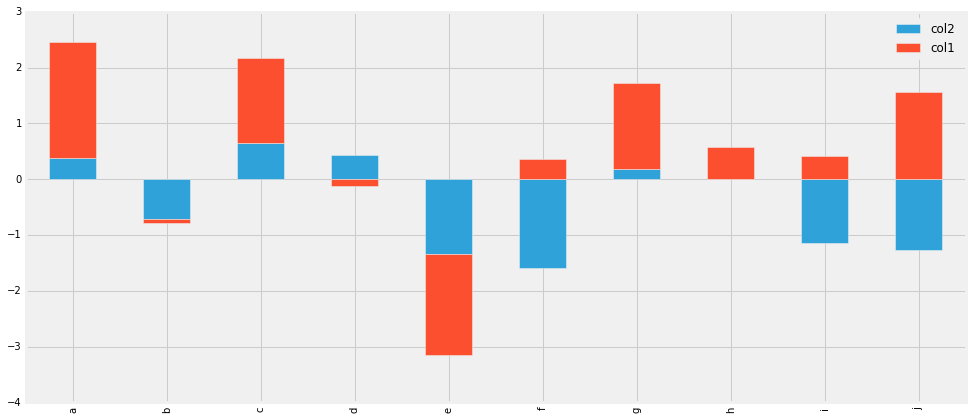

In [94]:
df[['col2', 'col1']].plot(kind='bar', stacked=True, figsize=(15,7))

Must use on multiple columns

## Stacked works on hbar too

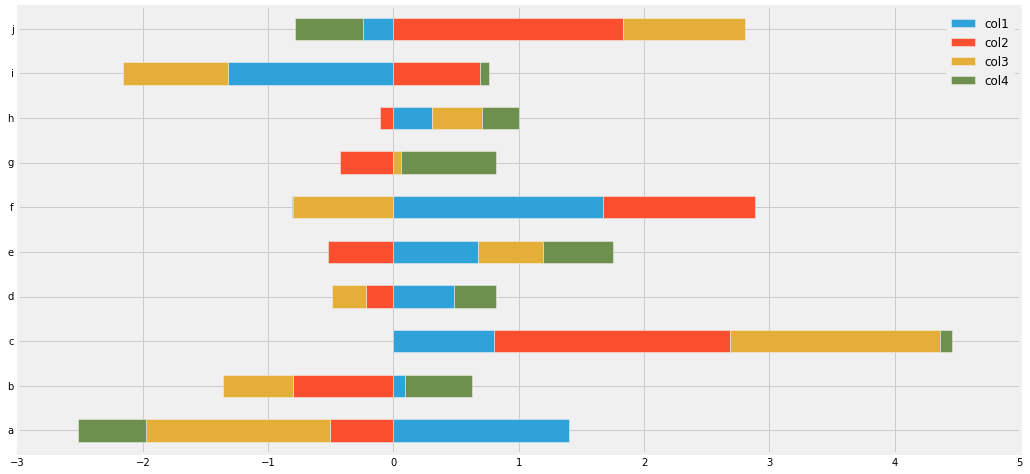

In [24]:
df.plot(kind='barh', stacked=True, figsize=(16,8))

## Exercise:

- Create a vertical stacked bar chart using col1 and col2
- What happens when you use df[['col1', 'col2']] vs. df[['col2', 'col1']]?
- Create a horizontal stacked bar char using all columns

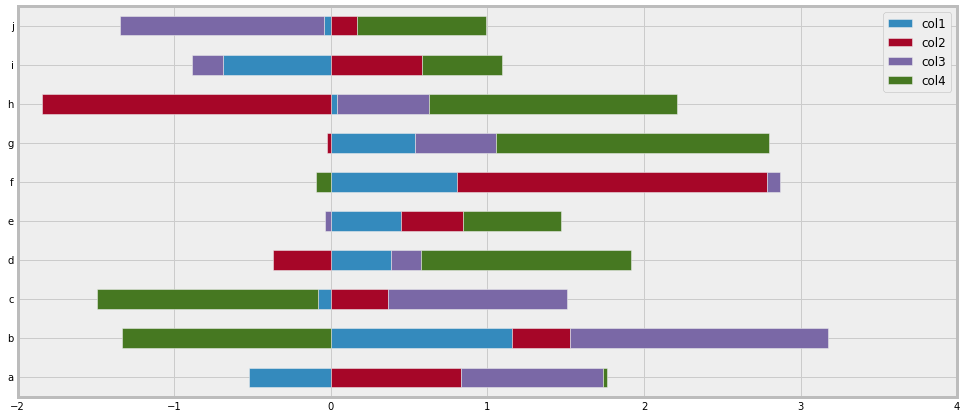

In [76]:
# df[['col2', 'col1']].plot(kind='bar', stacked=True, figsize=(15,7))
df.plot(kind='barh', stacked=True, figsize=(15,7))

# Scatter Plots

Notic the s parameter - that changes the marker size

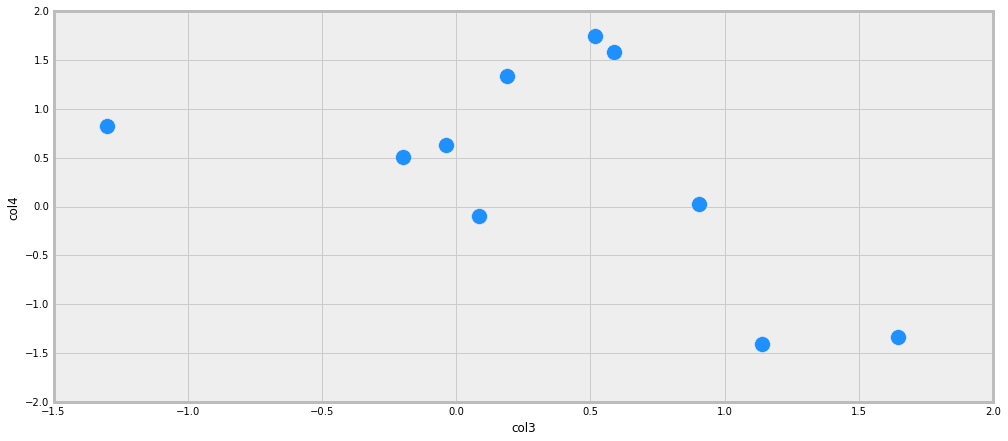

In [78]:
df.plot(x='col3', y='col4', kind='scatter', color='dodgerblue',\
        figsize=(15,7), s=250)

## Exercise

- Create a scatter plot using the DataFrame below. 
- Adjust the size of each point so that it is the value of the y variable to the 4th power.
- If you get stuck look at the documentation - what data type does s accept?

In [79]:
sp_dict = {'x': [1,2,3,4,5], 'y': [2,5,3,9,12]}
sp = pd.DataFrame(sp_dict)
sp

,x,y
0,1,2
1,2,5
2,3,3
3,4,9
4,5,12


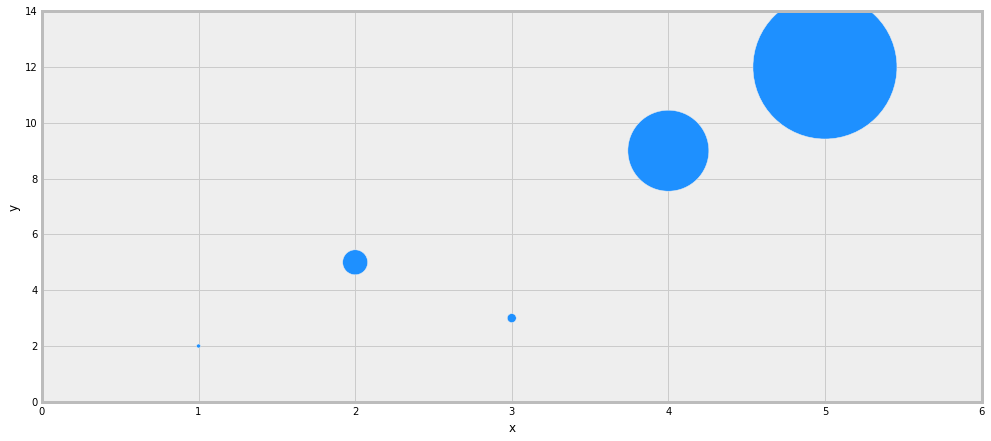

In [94]:
sp.plot(x='x', y='y', kind='scatter', color='dodgerblue', figsize=(15,7), s=[x**4 for x in sp['y']])

# Histograms

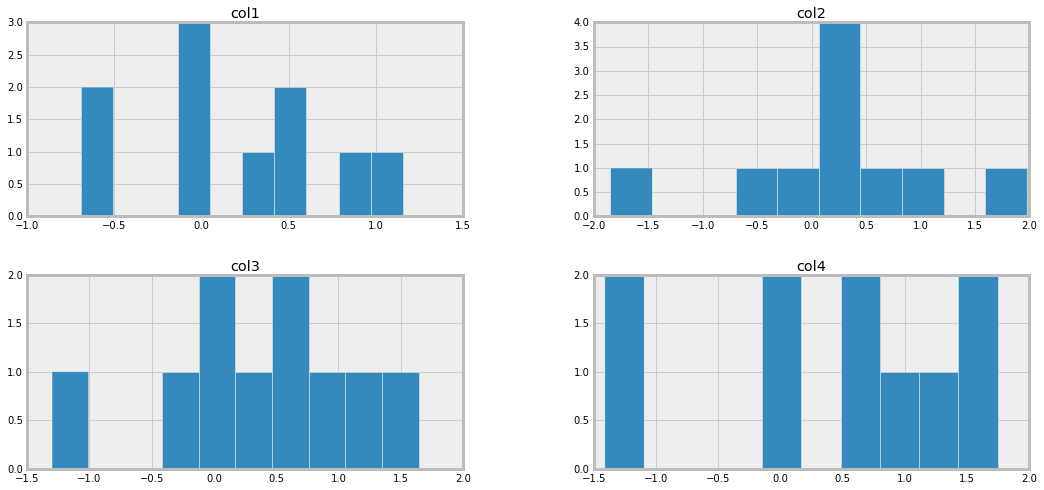

In [95]:
df.hist(figsize=(16,8));

## Single historgram

In [96]:
norm = np.random.standard_normal(5000)

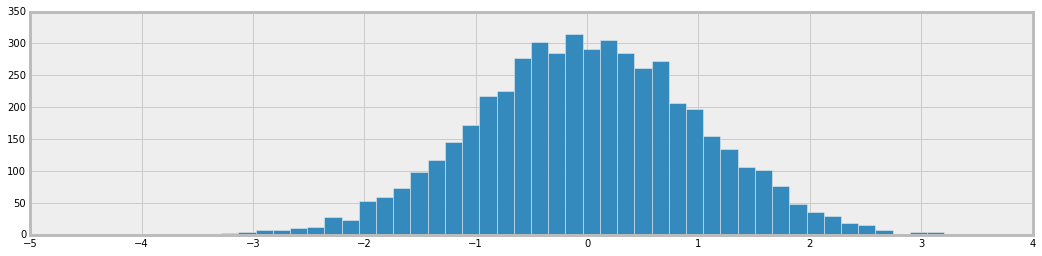

In [97]:
pd.Series(norm).hist(figsize=(16,4), bins=50)

## Bins param adjusts the no. of bins

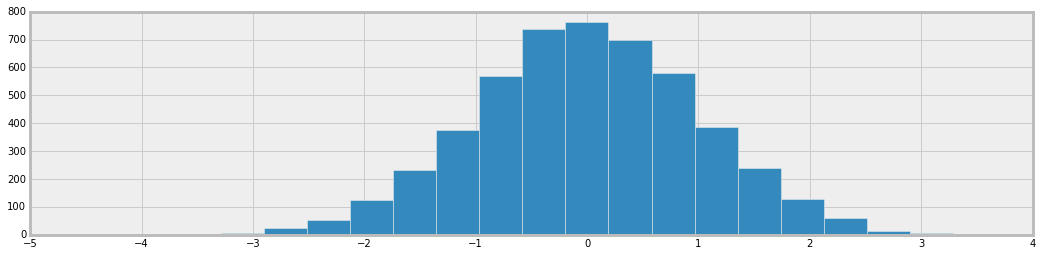

In [98]:
pd.Series(norm).hist(figsize=(16,4), bins=20)

## Exercise:

- Create a histogram of the poisson distribution using the parameters 5 and 1 million. (think numpy)
- Set the bins to 20.

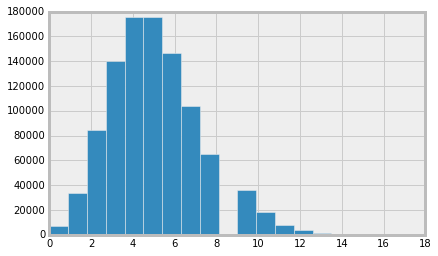

In [99]:
poi = pd.Series(np.random.poisson(5, 1000000))
poi.hist(bins=20)

## Understanding figures, subplots, and axes

In matplotlib, the figure (an instance of the class plt.Figure) can be thought of as a single container which contains all the objects representing axes, graphics, text, labels, etc. 

The axes (an instance of the class plt.Axes) is what we see below: a bounding box with ticks and labels, which will eventually contain other plot elements.


![](http://i.imgur.com/E05ZNhW.png)

A 2 by 1 subplot arrangement - think rows by columns

![](http://i.imgur.com/68vR8hy.png)

A 2 by 2 arrangement - 2 rows and two columns

![](http://i.imgur.com/Ec127C8.png)

![](http://i.imgur.com/82ZpnLN.png)

## Create an example

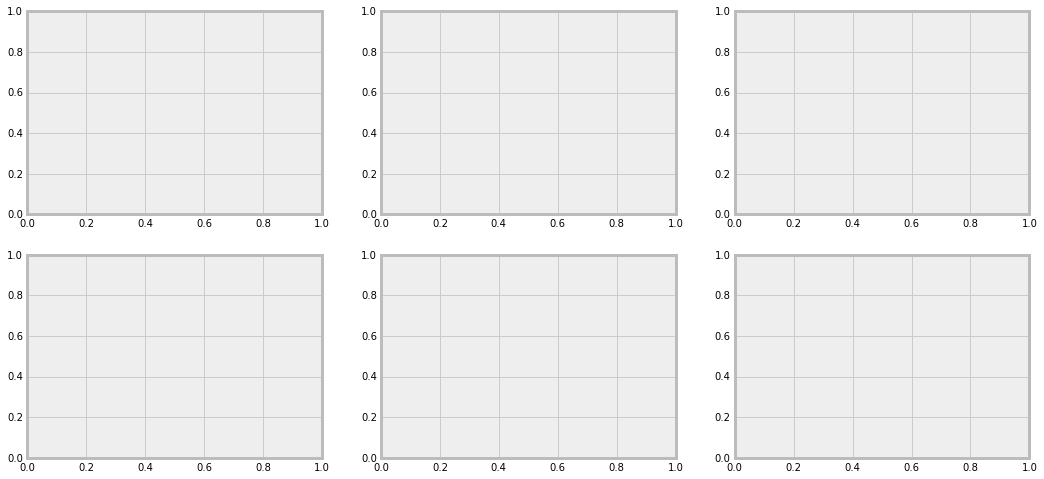

In [100]:
fig, axes = plt.subplots(2,3, figsize=(16,8))

axes_details = type(axes)
fig_details = type(fig)

In [101]:
fig_details

matplotlib.figure.Figure

In [102]:
axes_details

numpy.ndarray

In [103]:
axes.shape

(2, 3)

## So we see we have an array of subplots - How do we specify?

In [115]:
# access the first row
axes[0]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x127ec9550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12a200a90>], dtype=object)

In [116]:
# access the second row
axes[1]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12a261d90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12a347bd0>], dtype=object)

In [104]:
# access the bottom right plot
axes[1][2]

## Let's add a plot to that one

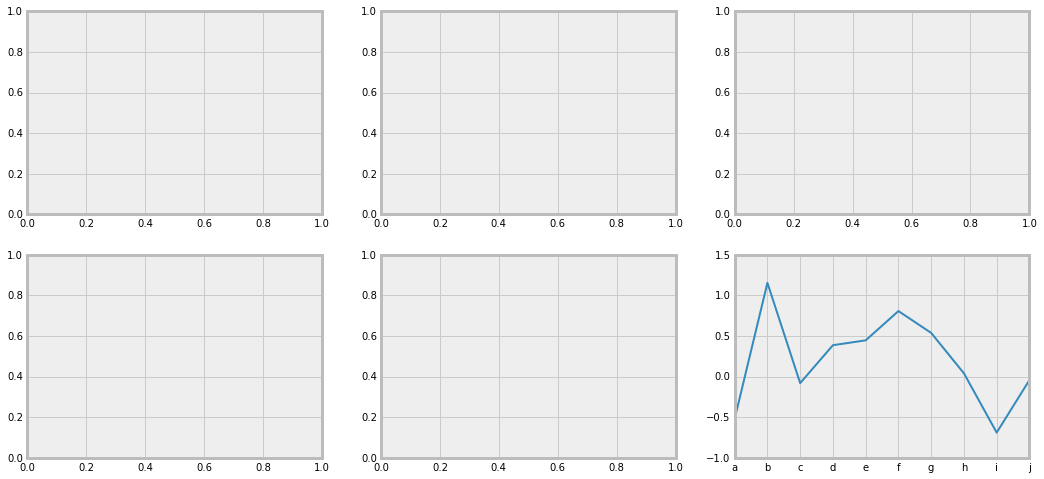

In [105]:
fig2, axes2 = plt.subplots(2,3, figsize=(16,8))
axes2[1][2] = df['col1'].plot()

## Changing ticks on a subplot

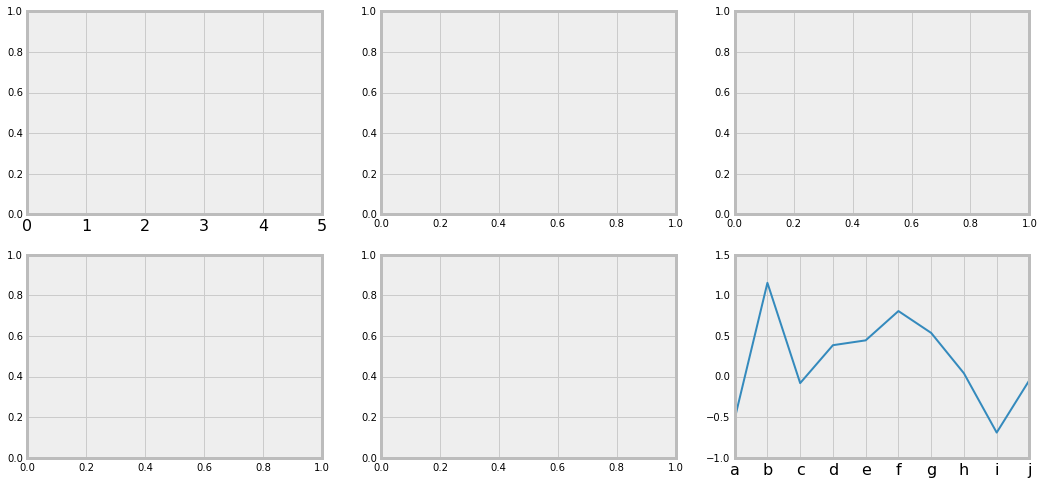

In [106]:
fig2, axes2 = plt.subplots(2,3, figsize=(16,8))

axes2[1][2] = df['col1'].plot()

# change upper-left plot x ticks
axes2[0][0].set_xticklabels([0,1,2,3,4,5], fontsize=16)

# change lower-right plot x ticks
axes2[1][2].set_xticklabels(['a','b','c','d','e','f', 'g', 'h', 'i', 'j'], fontsize=16);

## Setting titles

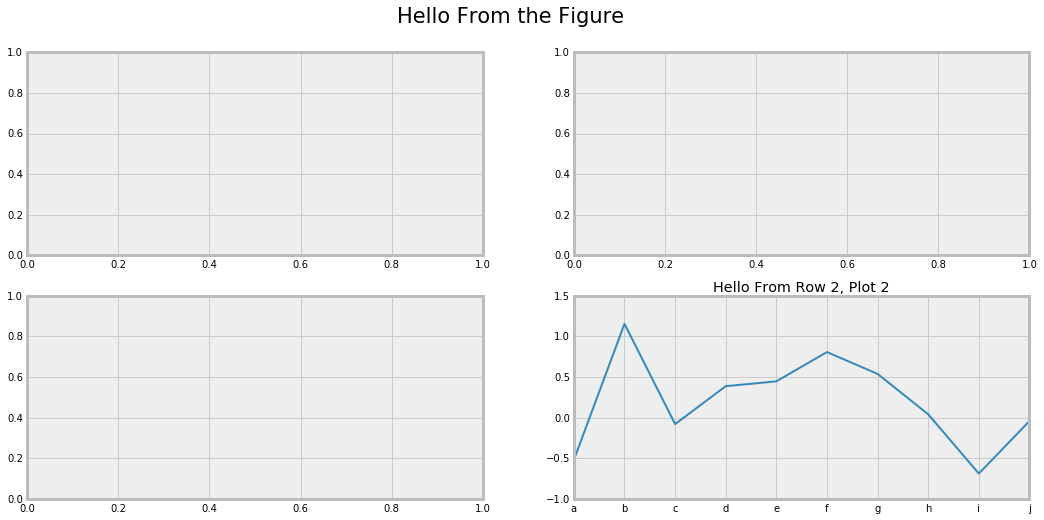

In [107]:
fig2, axes2 = plt.subplots(2,2, figsize=(16,8))

axes2[1][1] = df['col1'].plot()

# set title for bottom-right plot
axes2[1][1].set_title('Hello From Row 2, Plot 2')

fig2.suptitle('Hello From the Figure', fontsize=21)

## Independent Exercise

- Create a plot that is 1 across and three long
- Create a line 10 elements long with a postive slope in the first plot 
- Color it green
- Give it a title
- In the second plot, create a line (10 elements) with a negative slope
- Give it a title
- Color it red
- In the last plot, plot both a line with an increasing slope and a decreasing slope
- Give that a title as well
- Finally, give the entire plot a main title
- Now using those same negative and positive values, create a DataFrame from them
- Using that DataFrame, create two scatterplots using pandas plotting one with a positive slope and one with a negative slope. Make sure to adjust the marker size so that the dots are large enough to view easily.
- Now using subplots with matplotlib, draw both scatterplots on a single subplot
- Using .set_xlim() change the scatter plot so that it starts at zero

## Conclusion

In this lecture, we've seen:
- How to work with pandas plotting functionality such as .hist(), .plot(), .scatter(), etc.
- How to change the kind parameter to adjust the type of plots
- How to manipulate the plots to add titles and change the fontsizes of the ticks
- How to work with the matplotlib object model to customize all aspects of the plots
- How to work with multiple subplots

Please use the remaninder of the day to incorporate these plotting lessons into your project work.

We'll be here to answer any questions you might have, but remember try to work it out yourself first. If you run into errors, try to examine where exactly the occured. What does the stack trace say? What kind of error is it? Make sure
you are checking the types of things. And remember the order of operations:
- Documentation
- Stack Overflow
- Table Neighbors
- Your instructors